In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import inception_v3
import numpy as np
from scipy.linalg import sqrtm
from GAN_FC.models import Generator
from WGAN.models import Generator as WGAN_Generator
from ACGAN_BEST.models import Generator as ACGAN_Generator
from GAN_EXT.models import Generator as GAN_EXT_Generator
from GAN_CONV.models import Generator as GAN_CONV_Generator
from tqdm import tqdm
import torch_fidelity
import os
from PIL import Image
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from torchmetrics.functional.image import perceptual_path_length
import torch
import torchvision
from torchmetrics.image import StructuralSimilarityIndexMeasure
from torchmetrics.image import MultiScaleStructuralSimilarityIndexMeasure
import random
from torch.utils.data import DataLoader



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [2]:

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=len(cifar10_dataset) // 100, shuffle=True)

Files already downloaded and verified


In [10]:
# ACGAN Image Generation
generator = ACGAN_Generator().to(device)
folder_name = "ACGAN_BEST"
generator.load_state_dict(torch.load(f"./{folder_name}/final_models/final_generator.pth"))

# Create a folder to store the generated images
os.makedirs(f"./{folder_name}/generated_images", exist_ok=True)
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, 100).to(device)
    gen_labels = torch.randint(0, 10, (num_samples,)).to(device)
    one_hot_labels = F.one_hot(gen_labels, 10)
    input_vector = torch.cat((z, one_hot_labels.float()), dim=1)
    generated_images = generator(input_vector)
    generated_images = generated_images.cpu().detach().numpy()
    generated_images = generated_images / 2 + 0.5
    for i in range(len(generated_images)):
        img = generated_images[i]
        img = np.moveaxis(img, 0, -1)
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"./{folder_name}/generated_images/image_{i}.png")

        



In [12]:
# WGAN Image Generation
generator = WGAN_Generator(100).to(device)
folder_name = "WGAN"
generator.load_state_dict(torch.load(f"./{folder_name}/final_models/final_generator.pth"))

# Create a folder to store the generated images
os.makedirs(f"./{folder_name}/generated_images", exist_ok=True)
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, 100, 1, 1).to(device)
    generated_images = generator(z)

    generated_images = generated_images.cpu().detach().numpy()
    generated_images = generated_images / 2 + 0.5
    for i in range(len(generated_images)):
        img = generated_images[i]
        img = np.moveaxis(img, 0, -1)
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"./{folder_name}/generated_images/image_{i}.png")

In [14]:
# GAN Image Generation
generator = Generator(100).to(device)
folder_name = "GAN_FC"
generator.load_state_dict(torch.load(f"./{folder_name}/final_models/final_generator.pth"))

# Create a folder to store the generated images
os.makedirs(f"./{folder_name}/generated_images", exist_ok=True)
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, 100).to(device)
    generated_images = generator(z)

    generated_images = generated_images.cpu().detach().numpy()
    generated_images = generated_images / 2 + 0.5
    for i in range(len(generated_images)):
        img = generated_images[i]
        img = np.moveaxis(img, 0, -1)
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"./{folder_name}/generated_images/image_{i}.png")


In [18]:
# GAN Image Generation
generator = GAN_EXT_Generator(100).to(device)
folder_name = "GAN_EXT"
generator.load_state_dict(torch.load(f"./{folder_name}/final_models/final_generator.pth"))

# Create a folder to store the generated images
os.makedirs(f"./{folder_name}/generated_images", exist_ok=True)
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, 100).to(device)
    generated_images = generator(z)

    generated_images = generated_images.cpu().detach().numpy()
    generated_images = generated_images / 2 + 0.5
    for i in range(len(generated_images)):
        img = generated_images[i]
        img = np.moveaxis(img, 0, -1)
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"./{folder_name}/generated_images/image_{i}.png")

In [21]:

# GAN Image Generation
generator = GAN_CONV_Generator(100).to(device)
folder_name = "GAN_CONV"
generator.load_state_dict(torch.load(f"./{folder_name}/final_models/generator_300.pth"))

# Create a folder to store the generated images
os.makedirs(f"./{folder_name}/generated_images", exist_ok=True)
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, 100).to(device)
    generated_images = generator(z)

    generated_images = generated_images.cpu().detach().numpy()
    generated_images = generated_images / 2 + 0.5
    for i in range(len(generated_images)):
        img = generated_images[i]
        img = np.moveaxis(img, 0, -1)
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"./{folder_name}/generated_images/image_{i}.png")

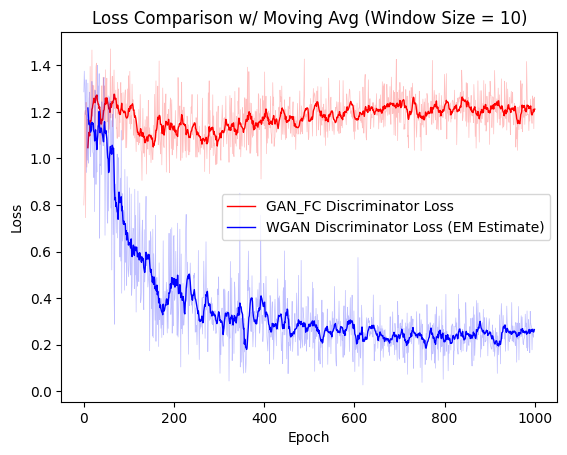

In [63]:
# Importing data from the WGAN folder
wgan_df = pd.read_csv('WGAN/training_data/training_metrics.csv')

# Importing data from the GAN_FC folder
gan_fc_df = pd.read_csv('GAN_FC/training_data/training_metrics.csv')

wgan_df['discriminator_loss_ma'] = wgan_df['discriminator_loss'].rolling(window=10).mean()
wgan_df['generator_loss_ma'] = wgan_df['generator_loss'].rolling(window=10).mean()

# Calculating moving average with window size 10 for GAN_FC data
gan_fc_df['discriminator_loss_ma'] = gan_fc_df['discriminator_loss'].rolling(window=10).mean()
gan_fc_df['generator_loss_ma'] = gan_fc_df['generator_loss'].rolling(window=10).mean()

# Plotting discriminator and generator loss for each
# Plotting moving average of discriminator and generator loss for each
plt.plot(gan_fc_df['epoch'], gan_fc_df['discriminator_loss'], alpha=0.25, linewidth=0.5, c='r')
plt.plot(gan_fc_df['epoch'], gan_fc_df['discriminator_loss_ma'], label='GAN_FC Discriminator Loss', linewidth=1, c='r')

plt.plot(wgan_df['epoch'], -1 * wgan_df['discriminator_loss'], alpha=0.25, linewidth=0.5, c='b')
plt.plot(wgan_df['epoch'], -1 * wgan_df['discriminator_loss_ma'], label='WGAN Discriminator Loss (EM Estimate)',  linewidth=1, c='b')




plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison w/ Moving Avg (Window Size = 10)')
plt.legend()
plt.show()

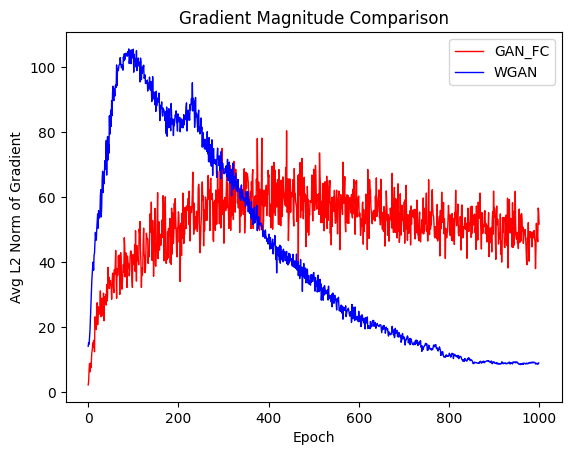

In [60]:
plt.plot(gan_fc_df['epoch'], gan_fc_df['avg_d_grad'], label='GAN_FC', linewidth=1, c='r')

plt.plot(wgan_df['epoch'], wgan_df['discriminator_grad_norm'], label='WGAN',  linewidth=1, c='b')




plt.xlabel('Epoch')
plt.ylabel('Avg L2 Norm of Gradient')
plt.title('Gradient Magnitude Comparison')
plt.legend()
plt.show()

In [64]:
def latent_space_interpolation(generator_model, latent_size=100, num_steps=7):
    device = next(generator_model.parameters()).device
    
    # Create latent vectors for interpolation
    latent_vectors = torch.randn(2, latent_size, device=device)
    
    # Interpolate between the latent vectors
    interpolated_vectors = []
    for i in range(num_steps):
        alpha = i / (num_steps - 1)
        interpolated_vector = latent_vectors[0] * (1 - alpha) + latent_vectors[1] * alpha
        interpolated_vectors.append(interpolated_vector)
    interpolated_vectors = torch.stack(interpolated_vectors)
    
    # Generate images using the generator model
    with torch.no_grad():
        generated_images = generator_model(interpolated_vectors).cpu()
    
    # Plot the generated images in a single row
    plt.figure(figsize=(15, 3))
    for i, image in enumerate(generated_images):
        plt.subplot(1, num_steps, i + 1)
        plt.imshow(image.squeeze().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()

Files already downloaded and verified


In [4]:
# Split CIFAR-10 dataset
class_splits = split_dataset(cifar10_dataset)



In [10]:
print(class_splits[0][0])

[ 9604  6165 32538 ... 24622 27231 13629]


In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
import random

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

classes = trainset.classes

# Create dictionary to hold images by class
class_images = {c: [] for c in classes}

# Group images by class
for img, label in trainset:
    class_images[classes[label]].append(img)

# Generate random pairs for each class
pair_dict = {}
for c in classes:
    images = class_images[c]
    pair_dict[c] = []
    for _ in range(100):
        img1, img2 = random.sample(images, 2)
        pair_dict[c].append((img1, img2))

# Check random pairs
print(len(pair_dict)) 

Files already downloaded and verified
10


In [166]:
ssim = StructuralSimilarityIndexMeasure()
mssim = MultiScaleStructuralSimilarityIndexMeasure()

In [170]:
avg_ssim_per_class = {}
for c in trainset.classes:
    ssim_values = []
    images_1 = torch.stack([img1 for img1, _ in pair_dict[c]])
    images_2 = torch.stack([img2 for _, img2 in pair_dict[c]])
    ssim_val = ssim(images_1, images_2)
    avg_ssim_per_class[c] = ssim_val

In [171]:
for c in avg_ssim_per_class:
    print(f"Class: {c}, Average SSIM: {avg_ssim_per_class[c]}")
print(f"Average SSIM: {sum(avg_ssim_per_class.values()) / len(avg_ssim_per_class)}")

Class: airplane, Average SSIM: 0.02949945628643036
Class: automobile, Average SSIM: 0.026368064805865288
Class: bird, Average SSIM: 0.02554314211010933
Class: cat, Average SSIM: 0.016127649694681168
Class: deer, Average SSIM: 0.014724783599376678
Class: dog, Average SSIM: 0.020243341103196144
Class: frog, Average SSIM: 0.02454180084168911
Class: horse, Average SSIM: 0.027232801541686058
Class: ship, Average SSIM: 0.02725648134946823
Class: truck, Average SSIM: 0.025049949064850807
Average SSIM: 0.023658746853470802


In [71]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
generator = ACGAN_Generator().to(device)
generator.load_state_dict(torch.load(f"./ACGAN_BEST/final_models/final_generator.pth"))
generator.eval()
gen_ssim_per_class = {}

for c in classes:
    z1 = torch.randn(100, 100).to(device)
    z2 = torch.randn(100, 100).to(device)
    one_hot = F.one_hot(torch.tensor([c] * 100), 10).float().to(device)
    z1 = torch.cat((z1, one_hot), dim=1)
    z2 = torch.cat((z2, one_hot), dim=1)
    img1 = generator(z1).cpu().detach()
    img2 = generator(z2).cpu().detach()
    ssim_val = ssim(img1, img2)
    gen_ssim_per_class[c] = ssim_val

    

In [133]:
for c in gen_ssim_per_class:
    print(f"Class: {c}, Average SSIM: {gen_ssim_per_class[c]}")
print("Average SSIM for Generated Images: ", np.mean(list(gen_ssim_per_class.values())))

Class: 0, Average SSIM: 0.044270988553762436
Class: 1, Average SSIM: 0.0460694395005703
Class: 2, Average SSIM: 0.026475895196199417
Class: 3, Average SSIM: 0.03380236029624939
Class: 4, Average SSIM: 0.065093994140625
Class: 5, Average SSIM: 0.029018672183156013
Class: 6, Average SSIM: 0.06565391272306442
Class: 7, Average SSIM: 0.04912453517317772
Class: 8, Average SSIM: 0.03459576517343521
Class: 9, Average SSIM: 0.05358031392097473
Average SSIM for Generated Images:  0.044768587


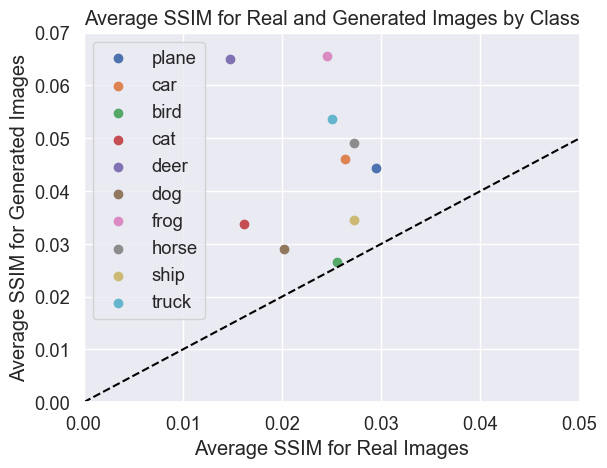

In [172]:


# plot ssim for real and generated images for each class
real_ssim = list(avg_ssim_per_class.values())
gen_ssim = list(gen_ssim_per_class.values())
label_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.close()

for i, (real, gen) in enumerate(zip(real_ssim, gen_ssim)):
    plt.scatter(real, gen, label=label_names[i])

plt.xlim(0, 0.05)
plt.ylim(0, 0.07)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Average SSIM for Real Images')
plt.ylabel('Average SSIM for Generated Images')
plt.title('Average SSIM for Real and Generated Images by Class')
plt.legend()
plt.show()

In [105]:
import torch.nn as nn

class Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1):
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, padding=1, stride=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.identity = nn.Sequential()
        if in_channels != out_channels:
            self.identity = nn.Sequential(nn.Conv2d(in_channels, out_channels, 1, stride=stride), 
                                          nn.BatchNorm2d(out_channels))

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.identity(x)
        out = F.relu(out)
        return out
    
# define the ResNet model
class ResNetCIFAR(nn.Module):
    def __init__(self):
        super(ResNetCIFAR, self).__init__()
        self.conv  = nn.Conv2d(3, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.block1 = Block(16, 16, 3)
        self.block2 = Block(16, 16, 3)
        self.block3 = Block(16, 16, 3)
        
        self.block4 = Block(16, 32, 3, stride=2)
        self.block5 = Block(32, 32, 3)
        self.block6 = Block(32, 32, 3)
        
        self.block7 = Block(32, 64, 3, stride=2)
        self.block8 = Block(64, 64, 3)
        self.block9 = Block(64, 64, 3)

        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv(x)))
        
        # Layer 1
        out = self.block1.forward(out)
        out = self.block2.forward(out)
        out = self.block3.forward(out)
        
        # Layer 2
        out = self.block4.forward(out)
        out = self.block5.forward(out)
        out = self.block6.forward(out)
        
        # Layer 3
        out = self.block7.forward(out)
        out = self.block8.forward(out)
        out = self.block9.forward(out)
        
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [106]:
# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [107]:
net = ResNetCIFAR()
net.load_state_dict(torch.load('resnet.pth')['state_dict'])
net.cuda()

ResNetCIFAR(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): Block(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (identity): Sequential()
  )
  (block2): Block(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (identity): Sequential()
  )
  (block3): Block(
    (conv1): Conv2d(

In [116]:
net.eval()
correct = 0
total = 0
d = [7, 6, 4, 9, 3, 8, 0, 2, 5, 1]
with torch.no_grad():
    for images, labels in testloader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        predicted = outputs.argmax(1)
        act_predicted = []
        for pred in predicted:
            act_predicted.append(d[pred])
        act_predicted = torch.from_numpy(np.array(act_predicted)).cuda()
        total += labels.size(0)
        correct += (act_predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97.20 %


In [118]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
generator = ACGAN_Generator().to(device)
generator.load_state_dict(torch.load(f"./ACGAN_BEST/final_models/final_generator.pth"))
generator.eval()

acc_per_class = []
num_samples = 10000

predicted_all = []
actual_all = []

for c in classes:
    correct = 0
    total = 0
    with torch.no_grad():
        z = torch.randn(num_samples, 100).to(device)
        one_hot = F.one_hot(torch.tensor([c] * num_samples), 10).float().to(device)
        actual_all = actual_all + [c] * num_samples
        z = torch.cat((z, one_hot), dim=1)
        images = generator(z).cuda()
        outputs = net(images)
        predicted = outputs.argmax(1)
        act_predicted = []
        for pred in predicted:
            act_predicted.append(d[pred])
        act_predicted = torch.from_numpy(np.array(act_predicted)).cuda()
        predicted_all = predicted_all + act_predicted.cpu().numpy().tolist()
        total += num_samples
        correct += (act_predicted == c).sum().item()
    acc_per_class.append(correct / total)

In [119]:
for c, acc in zip(classes, acc_per_class):
    print(f"Class: {c}, Accuracy: {acc * 100:.2f}%")
print(f"Overall Accuracy: {np.mean(acc_per_class) * 100:.2f}%")

Class: 0, Accuracy: 39.36%
Class: 1, Accuracy: 3.95%
Class: 2, Accuracy: 43.23%
Class: 3, Accuracy: 53.68%
Class: 4, Accuracy: 57.69%
Class: 5, Accuracy: 27.47%
Class: 6, Accuracy: 83.62%
Class: 7, Accuracy: 22.73%
Class: 8, Accuracy: 75.55%
Class: 9, Accuracy: 13.16%
Overall Accuracy: 42.04%


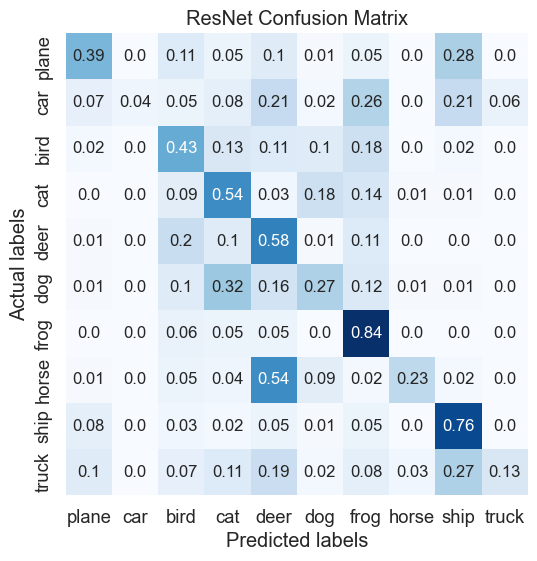

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

label_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(actual_all, predicted_all)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix
cm = np.round(cm, 2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt=".2", cmap="Blues", cbar=False, square=True,
            xticklabels=label_names, yticklabels=label_names, annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('ResNet Confusion Matrix')
plt.show()

In [4]:
# CIFAR-10 dataset
transform = transforms.Compose([
                transforms.Resize(32),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            ])

train_dataset = datasets.CIFAR10(
    root="./data", train=True, transform=transform, download=True
)
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

Files already downloaded and verified
